In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
import os
!ls

figures			 __pycache__		     tables
hmf_clusters.ipynb	 README.md		     utils
merge_photons.ipynb	 scaling_relations.ipynb     xspec_table_models.py
model_atable_19787.fits  spectra_from_photons.ipynb
newLogFile.txt		 spectra_magneticum.ipynb


## List of clusters from Magneticum's $5x5$ degrees field for $\textit{eROSITA}$:

In [2]:
spisok = pd.read_csv("../data/eROSITA_5.0x5.0/Catalouges/cluster.dat", sep='\s+')
spisok

,ihal,x_pix,y_pix,z_pix,Rrel,Mvir,z_true,z_obs,M500,R500,Mstar500,Mgas500,T500,Lx500,Ysz500,M200,R200,flag
0,4488,0.158985,0.338312,-0.001185,0.001292,4.359560e+12,1.841289,1.841877,2.333170e+12,237.530,1.630180e+11,2.876200e+11,0.225047,0.430616,3.264381e-07,3.896570e+12,382.480,1
1,10920,0.411453,0.567867,-0.000886,0.001211,3.587970e+12,1.841375,1.841157,2.343910e+12,237.897,1.579330e+11,2.848240e+11,0.353030,0.298469,5.055408e-07,3.452630e+12,367.372,1
2,9879,0.614948,0.552184,-0.000867,0.001237,3.821110e+12,1.841381,1.840472,2.813710e+12,252.819,1.675460e+11,3.050620e+11,0.460362,0.866890,6.251936e-07,3.689000e+12,375.570,1
3,10554,0.338922,0.861748,-0.000626,0.001230,3.762290e+12,1.841451,1.842172,2.722610e+12,250.079,1.467930e+11,3.347020e+11,0.212813,0.135184,3.240774e-07,3.631350e+12,373.593,1
4,9471,0.790183,0.114536,-0.000542,0.001246,3.905190e+12,1.841475,1.841036,2.655260e+12,248.001,1.253810e+11,3.391100e+11,0.193536,0.347480,3.036291e-07,3.776650e+12,378.518,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80719,17829,0.176474,0.934348,0.535773,0.044300,6.445740e+12,0.035010,0.033442,3.079510e+12,178.401,8.751090e+10,1.426880e+11,0.228647,0.002093,3.502228e-08,4.627230e+12,277.317,0
80720,16684,0.172749,0.799259,0.678075,0.045091,6.797670e+12,0.039740,0.038561,3.936150e+12,193.608,1.330060e+11,2.442580e+11,0.174054,0.005065,3.874990e-08,5.487050e+12,293.524,0
80721,23827,0.780422,0.841268,0.700093,0.035582,3.339550e+12,0.040473,0.039492,1.693910e+12,146.164,9.393110e+10,9.740160e+10,0.104610,0.000744,1.629454e-08,2.476620e+12,225.161,0
80722,43768,0.165853,0.769312,0.890579,0.035184,3.228940e+12,0.046824,0.046678,1.736550e+12,147.385,7.416080e+10,1.191250e+11,0.092758,0.002550,1.737916e-08,2.555850e+12,227.532,0


In [3]:
min(spisok["M500"])/10**11, max(spisok["M500"])/10**14, min(spisok["z_true"]), max(spisok["z_true"])

(5.26424, 4.07547, 0.020103892, 2.1539604)

### ... or $30x30$ degrees:

In [4]:
spisok = pd.read_csv("../data/eROSITA_30.0x30.0/Catalouges/cluster.dat", sep='\s+')
spisok

,ihal,x_pix,y_pix,z_pix,Rrel,Mvir,z_true,z_obs,M500,R500,Mstar500,Mgas500,T500,Lx500,Ysz500,M200,R200,flag
0,1199,0.544662,0.600756,-0.008298,0.003015,6.412800e+13,0.156403,0.156474,3.274430e+13,427.372,1.077800e+12,2.716210e+12,0.852811,0.071189,5.602394e-07,5.316070e+13,681.705,1
1,4892,0.184225,0.954721,-0.005059,0.002147,2.315120e+13,0.156524,0.155755,1.387060e+13,320.948,3.662060e+11,1.070010e+12,0.546339,0.029094,2.506972e-07,1.904230e+13,484.132,1
2,9174,0.711115,0.065371,-0.005023,0.001850,1.481120e+13,0.156525,0.157581,7.888580e+12,265.919,2.633580e+11,4.274600e+11,0.465220,0.005180,1.242286e-07,1.295120e+13,425.758,1
3,1087,0.275818,0.254107,-0.004566,0.003034,6.535070e+13,0.156542,0.156442,3.869360e+13,451.823,1.060980e+12,3.463200e+12,1.025380,0.126354,7.684081e-07,5.545200e+13,691.346,1
4,6773,0.444286,0.276345,-0.003916,0.002030,1.957370e+13,0.156567,0.155463,1.034820e+13,291.100,4.257780e+11,5.918140e+11,0.418629,0.012656,1.291515e-07,1.586250e+13,455.535,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19956,42250,0.673888,-0.000586,0.992336,0.005552,3.645580e+12,0.050222,0.049249,2.138080e+12,157.963,8.941730e+10,1.095840e+11,0.175103,0.000735,2.627347e-08,2.971980e+12,239.257,1
19957,14125,0.600291,0.511659,0.994208,0.008028,1.102430e+13,0.050284,0.050291,3.842520e+12,192.055,1.142230e+11,1.790640e+11,0.269794,0.004380,4.474792e-08,8.273360e+12,336.582,0
19958,7980,0.819291,0.087059,0.996020,0.009428,1.785580e+13,0.050345,0.049871,1.022700e+13,266.158,3.329330e+11,5.043310e+11,0.469443,0.005942,1.141840e-07,1.428460e+13,403.795,0
19959,17449,0.656089,0.448431,0.996763,0.007338,8.417910e+12,0.050370,0.050268,5.044200e+12,210.288,2.145610e+11,2.619130e+11,0.259758,0.003220,5.256350e-08,6.927380e+12,317.241,0


In [5]:
min(spisok["M500"])/10**11, max(spisok["M500"])/10**14, min(spisok["z_true"]), max(spisok["z_true"])

(5.23523, 4.94005, 0.017117297, 0.19494483)

## 1. Redshift-based analysis 

In [4]:
max(spisok["z_true"])

2.1539604

In [5]:
u, c = np.unique(spisok["z_true"], return_counts=True)
dup = u[c > 1]
len(dup)

114

In [75]:
len(u)

80610

In [76]:
len(spisok)

80724

### Histograms for $z_{true}$. Dashed red line is mean $z$ for each bin.

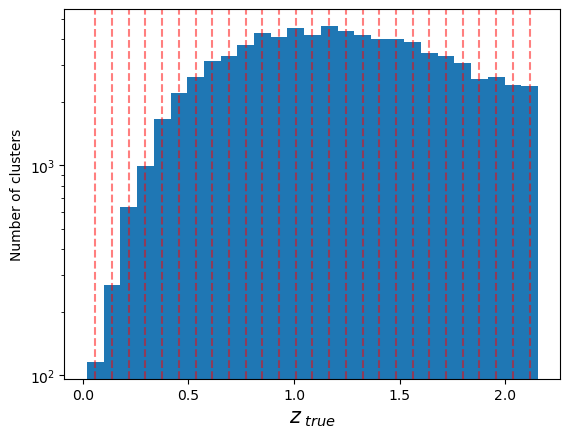

dz = 0.07903172251851852 * 27 = 2.133856508 === 2.133856508
left borders: [0.02010389 0.09913561 0.17816734 0.25719906 0.33623078 0.4152625
 0.49429423 0.57332595 0.65235767 0.73138939 0.81042112 0.88945284
 0.96848456 1.04751628 1.12654801 1.20557973 1.28461145 1.36364317
 1.4426749  1.52170662 1.60073834 1.67977006 1.75880179 1.83783351
 1.91686523 1.99589695 2.07492868 2.1539604 ]
centers [0.05961975 0.13865148 0.2176832  0.29671492 0.37574664 0.45477837
 0.53381009 0.61284181 0.69187353 0.77090526 0.84993698 0.9289687
 1.00800042 1.08703215 1.16606387 1.24509559 1.32412731 1.40315904
 1.48219076 1.56122248 1.6402542  1.71928593 1.79831765 1.87734937
 1.95638109 2.03541282 2.11444454]


In [77]:
z_all = spisok["z_true"]

# number of photon lists

N = 27 # 5x5
#N = 5 # 30x30

dndz, z_left, bars_z = plt.hist(z_all, bins=N, histtype='barstacked')
plt.yscale('log')
plt.xlabel("$z_{ \ true}$", fontsize = 15)
plt.ylabel("Number of clusters")
#plt.grid()

dz = np.diff(z_left)[0]        # it is the same for each bin
z_binned = z_left[:-1]+dz/2    # array of centers of each bin

for _ in z_binned:
    plt.axvline(_, color='r', linestyle="--", alpha = 0.5)

plt.show()

print('dz =', dz, '*', N, '=', dz*N, '===', max(z_all)-min(z_all))
print('left borders:', z_left)
#print(np.diff(z_left)[0]/2)
print('centers', z_binned)

In [78]:
dndz

array([ 116.,  271.,  636.,  996., 1673., 2213., 2640., 3147., 3315.,
       3748., 4270., 4096., 4531., 4169., 4617., 4374., 4186., 4007.,
       3997., 3871., 3433., 3304., 3089., 2594., 2626., 2424., 2381.])

#### Dictionary keys are mean redshifts for bins. All masses corresponding to certain bin will be the values.

In [173]:
dictionary = {}

for zz in z_binned:
    dictionary[zz] = []
    
dictionary

{0.059619753259259264: [],
 0.13865147577777778: [],
 0.21768319829629632: [],
 0.2967149208148148: [],
 0.37574664333333335: [],
 0.4547783658518519: [],
 0.5338100883703704: [],
 0.6128418108888888: [],
 0.6918735334074073: [],
 0.7709052559259258: [],
 0.8499369784444444: [],
 0.9289687009629629: [],
 1.0080004234814814: [],
 1.087032146: [],
 1.1660638685185185: [],
 1.2450955910370372: [],
 1.3241273135555556: [],
 1.403159036074074: [],
 1.4821907585925926: [],
 1.561222481111111: [],
 1.6402542036296297: [],
 1.7192859261481481: [],
 1.7983176486666668: [],
 1.8773493711851852: [],
 1.9563810937037036: [],
 2.0354128162222223: [],
 2.1144445387407407: []}

#### Extracting $M_{500}$ and $z_{true}$.

In [174]:
M500_all = spisok["M500"].to_numpy().astype(float)
z_all = spisok["z_true"].to_numpy().astype(float)
t = list(zip(z_all, M500_all))
M500_all, z_all

(array([2.33317e+12, 2.34391e+12, 2.81371e+12, ..., 1.69391e+12,
        1.73655e+12, 2.70652e+13]),
 array([1.8412886 , 1.8413752 , 1.8413808 , ..., 0.0404726 , 0.04682363,
        0.04745632]))

In [175]:
for _ in t:
    #print(_)
    z_current = _[0]
    for z_l in z_left[:-1]:
        if (z_current>=z_l) and (z_current<z_l+dz):
            #print(z_current, 'is between', z_l, 'and', z_l+dz)
            dictionary[z_l+dz/2].append(_[1])
        else:
            pass

In [176]:
summ = 0
for i in z_binned:
    summ = summ + len(dictionary[i])
summ

80723

## 2. Cosmology

#### Let's define some functions:

In [177]:
from astropy.cosmology import FlatLambdaCDM, LambdaCDM

#Cosmological Parameters from Magneticum:
Omega_M = 0.272
Omega_B = 0.0456      #(= 16.8 %)
Omega_L = 0.728
h = 0.704
n = 0.963
sigma_8 = 0.809

#### Comoving volume

From [Hogg (1999)](https://arxiv.org/pdf/astro-ph/9905116.pdf):

(28) $dV_C = D_H \frac{(1+z)^2 D^2_A}{E(z)}d \Omega dz$

where

(4) $D_{\mathrm{H}} \equiv \frac{c}{H_{0}}=3000 h^{-1} \mathrm{Mpc}=9.26 \times 10^{25} h^{-1} \mathrm{~m}$

and

(14) $E(z) \equiv \sqrt{\Omega_{\mathrm{M}}(1+z)^{3}+\Omega_{k}(1+z)^{2}+\Omega_{\Lambda}}$

In [178]:
h = 0.704
D_H = 3000/h #Mpc

def dif_comoving_volume(z, O_M, O_L):
    
    # Omega_M = 1
    # Omega_L = 0
    
    # h = 0.704
    # D_H = 3000/h #Mpc
    
    E = np.sqrt(O_M*(1+z)**3+O_L)
    
    D_A = LambdaCDM(H0=100*h, Om0=O_M, Ode0=O_L).angular_diameter_distance(z) #Mpc

    dif_com_vol = D_H*(1+z)**2*D_A.value**2/E 
    
    return dif_com_vol/D_H**3 # this is [1/D_H]**3 dV_c / dOmega / dz

#### Figure 5 from https://arxiv.org/pdf/astro-ph/9905116.pdf

dz = 0.07903172251851852


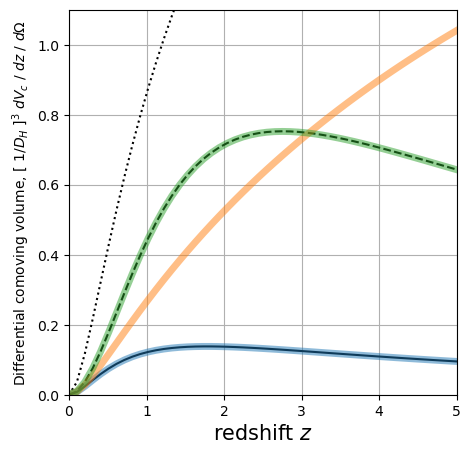

In [179]:
print('dz =', dz)

plt.figure(figsize=(5,5))

x = np.linspace(0, 5, 50)

y = dif_comoving_volume(x, 1, 0)

yy = dif_comoving_volume(x, 0.05, 0)

yyy = dif_comoving_volume(x, 0.2, 0.8)

#for _ in z_binned:
#    plt.axvline(_, color='r', linestyle="--", alpha = 0.5)
    
plt.plot(x, y, color='black', linestyle = '-')
plt.plot(x, yy, color='black', linestyle = ':')
plt.plot(x, yyy, color='black', linestyle = '--')

# Differential comoving volume per redshift per steradian at each input redshift

plt.plot(x, FlatLambdaCDM(H0=100*h, Om0=1).differential_comoving_volume(x)/D_H**3, alpha=0.5, linewidth=5)
plt.plot(x, LambdaCDM(H0=100*h, Om0=0.05, Ode0=0).differential_comoving_volume(x)/D_H**3, alpha=0.5, linewidth=5)
plt.plot(x, FlatLambdaCDM(H0=100*h, Om0=0.2).differential_comoving_volume(x)/D_H**3, alpha=0.5, linewidth=5)

plt.xlabel('redshift $z$', fontsize=15)
plt.ylabel('Differential comoving volume, $[ \ 1 / D_H \ ]^3 \ dV_c \ / \ dz \ / \ d\Omega$', fontsize=10)
plt.grid()
plt.xlim(0, 5)
plt.ylim(0, 1.1)
plt.show()

$\bar{\rho}_{m}(z) \equiv \Omega_{m}(z) \rho_{\mathrm{crit}}(z)=\bar{\rho}_{m}(0)(1+z)^{3}$ (Tinker 2008) only if $\Omega_M=1, \Omega_{\Lambda}=0$ (because $\rho_{crit} \sim H^2 \sim E^2(z)$ )

$\rho_{crit} = {3 H^2}/{8 \pi G} = 1,88 \cdot 10^{-26} h^2$ кг/м$^3$

In [180]:
def rho_crit(z, O_M, O_L):
    
    h = 0.704
    
    E_z_2 = O_M*(1+z)**3+O_L
    E_z = np.sqrt(E_z_2)
    #print(E_z)
    
    H = 100*h #km /s /Mpc
    
    # at z=0 
    # E_z_2 = 1
#    print('z = 0')
    
    # 1 pc = 3.08e16 m = 3.08e13 km
    # 1 Mpc = 3.08e19 km
    
    rho_crit = 3.*(H/3.08e19)**2/8./np.pi/6.67e-11/h**2
#    print(rho_crit, "h^2 kg/m^3$")
    
    #rho_crit = E_z_2* 3.*((70.*70.)/(8.*np.pi*4.302)) #in units of Msun/kpc^3
    #print(rho_crit, "Msun/kpc^3")
    
    rho_crit = rho_crit*(3.08e19)**3/2e30
#    print(rho_crit, "h^2 Msun/kpc^3")
    
    #at z!=0
#    print('z =',z)
    
    rho_crit = rho_crit*E_z_2
#    print(rho_crit, "h^2 Msun/kpc^3 ")

    rho_crit = rho_crit*h**2
#    print(rho_crit, "Msun/kpc^3 ")
     
    return rho_crit # Msun/kpc^3

print('Let\'s check at z = 0.5:')
print('my:', rho_crit(0.5, 1, 0)) 
print('astropy:', FlatLambdaCDM(H0=100*h, Om0=1).critical_density(0.5).value*(3.08e21)**3/2e33 )
print('above:', 3.*((70.*70.)/(8.*np.pi*4.302)) * (1+0.5)**3 )

Let's check at z = 0.5:
my: 460.99411089755836
astropy: 459.0033235851253
above: 458.8606819006658


## 3. Let's check everything for one certain z (in one certain bin of z):

In [192]:
zzz = z_binned[0]
print(zzz)
masses = dictionary[zzz]
print(len(masses))

0.059619753259259264
116


In [193]:
np.log10(min(masses)), np.log10(max(masses))

(12.128266762837846, 14.1081250947386)

Critical density for this z and for cosmology appreciated in Magneticum:

In [194]:
print('rho_crit =', rho_crit(zzz, Omega_M, Omega_L), 'Msun/kpc^3 =', 
      rho_crit(zzz, Omega_M, Omega_L)/h**2, 'h^2 Msun/kpc^3')

rho_crit = 143.64000695939845 Msun/kpc^3 = 289.82116590142056 h^2 Msun/kpc^3


In [195]:
FlatLambdaCDM(H0=100*h, Om0=Omega_M).critical_density(zzz).value*(3.08e21)**3/2e33

143.01970249855447

Considering the fact that we work in 5.0x5.0 deg field we obtain differential comoving volume in physical units for this z and for cosmology appreciated:

In [196]:
def phys_dcv(z, ddz, O_M, O_L):

    side = 5*np.pi/180 #rad

    dOmega=side**2

    return dif_comoving_volume(z, O_M, O_L) * dOmega * ddz * D_H**3 # Mpc^3

print(phys_dcv(zzz, dz, Omega_M, Omega_L), 'Mpc^3')

157256.83318693162 Mpc^3


##### See [HERE](https://astronomy.stackexchange.com/questions/44380/comoving-volume-calculation) and picture below for explanation of comoving volume that was used.

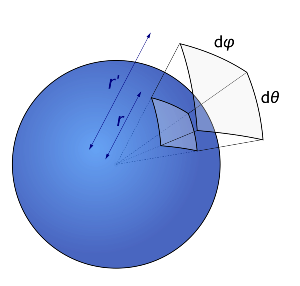

In [197]:
def phys_dcv_new(z, ddz, O_M, O_L):
    
    side = 5*np.pi/180 #rad
    
    dOmega=side**2
    
    V_big = FlatLambdaCDM(H0=100*h, Om0=O_M).comoving_volume(z+ddz/2)
    V_small = FlatLambdaCDM(H0=100*h, Om0=O_M).comoving_volume(z-ddz/2)
    
    return dOmega/4/np.pi * (V_big - V_small).value

print(phys_dcv_new(zzz, dz, Omega_M, Omega_L), 'Mpc^3')

177801.44218697524 Mpc^3


Checking in `astropy`:

In [198]:
from astropy import units

In [199]:
babab = 5*units.deg
babab

<Quantity 5. deg>

In [200]:
vpolne = FlatLambdaCDM(H0=100*h, Om0=Omega_M).differential_comoving_volume(zzz)*babab**2*dz
print(vpolne)
vpolne.to(units.Mpc**3)

515886589.7143643 deg2 Mpc3 / sr


<Quantity 157148.04186135 Mpc3>

In [201]:
phys_dcv(1.5, 0.1, Omega_M, Omega_L)

28602203.137900535

In [202]:
phys_dcv_new(1.5, 0.1, Omega_M, Omega_L)

28575568.616112053

In [264]:
len(np.ones(N1)/len(masses))

30

In [269]:
w.shape

(30,)

In [271]:
np.array(masses).shape

(116,)

### Mass functions:

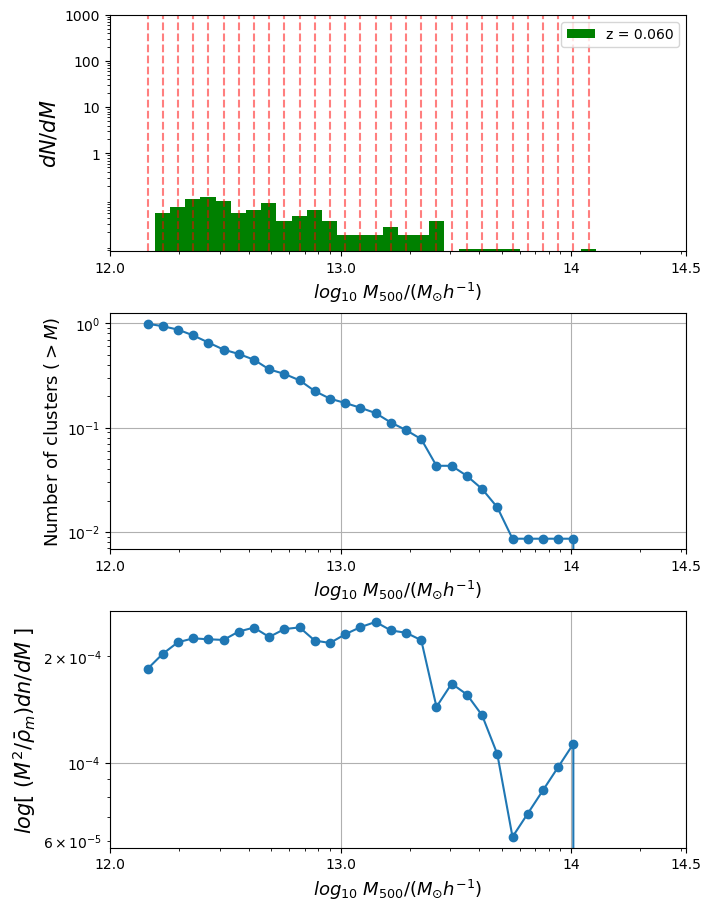

In [272]:
N1 = 30 # bins for masses

plt.figure(figsize=(7,9), layout="constrained")
#plt.subplots(2, 2)

plt.subplot(311)

# plotting histogram for all masses for this redshift

beans = np.logspace(np.log10(min(masses)), np.log10(max(masses)), N1+1) 

#beans = np.linspace(min(masses), max(masses), N1+1)

dNdM, M_left, bars_M = plt.hist(masses, 
                                bins=beans, 
                                color='green', 
                                histtype='barstacked',
                                log=False,
                                weights = np.ones(len(masses))/len(masses),
                                label = 'z = '+f"{zzz:.3f}")

plt.xscale('log')
plt.yscale('log')
plt.xticks([10**d for d in [12.0, 13.0, 14, 14.5]], [12.0, 13.0, 14, 14.5])
plt.yticks([1, 10, 100, 1000], [1, 10, 100, 1000])
plt.xlabel("$log_{10} \ M_{500}/(M_{\odot} h^{-1})$", fontsize = 13)
plt.ylabel(r"$ dN/dM $", fontsize = 15)
plt.legend()                    #prop={'size': 15}, handlelength=0, loc=0)
xxx = plt.gca().get_xlim()

dM = np.diff(M_left)                     # array of steps for masses, it is NOT the same for each bin    
M_binned = (M_left[:-1]+M_left[1:])/2    # array of centers of each bin

#print(M_left[:-1], M_left[1:])

#print(dM)
#print(np.log10(dM))

#plt.plot(M_binned, dM, marker='o')
    
for _ in M_binned:
    plt.axvline(_, color='r', linestyle="--", alpha = 0.5)   # draw red dashed line
    
plt.subplot(312)

# calculating cumulative mass function, i.e. Number of clusters that have greater or equal mass than given
# given == center of each bin
# dNdM from top histogram == Number of clusters in each bin
    
dNdM_cumulative=np.zeros(N1)

for i in range(0, N1):
    dNdM_cumulative[i] = np.sum(dNdM[i+1:])
    #print('Bin №', i+1, ':', dNdM[i], 'clusters;', dNdM_cumulative[i], 'with > mass')
    
#print(dNdM)
#print(dNdM_cumulative)

plt.plot(M_binned, dNdM_cumulative[:], marker='o')
plt.xscale('log')
plt.xlim(xxx)
plt.xticks([10**d for d in [12.0, 13.0, 14, 14.5]], [12.0, 13.0, 14, 14.5])
plt.yscale('log')
plt.xlabel("$log_{10} \ M_{500}/(M_{\odot} h^{-1})$", fontsize = 13)
plt.ylabel("Number of clusters ($> M$)", fontsize = 13)  # that have \n lower or equal mass than given
plt.grid()

plt.subplot(313)

# shifting from Number of clusters (N) in each bin to concentration of clusters (n) in each bin
# by division of dNdM on comoving volume for this z

dndM = dNdM_cumulative/phys_dcv_new(zzz, dz, Omega_M, Omega_L) # Mpc^(-3)

#print(dndM)
#print(np.sum(M_binned*dndM))
#print(rho_crit(zz))

# rescaling dndM in Tinker 2008 style

#print(dM)
#print(dM*N1)

rho_mean = rho_crit(zzz, Omega_M, Omega_L)/h**2  # h^2 Msun/kpc^3

yyy = (M_binned**2/rho_mean)/1e9*dndM/dM  # sure? dimension is h

plt.plot(M_binned, yyy, marker='o')
plt.xlim(xxx)
plt.xscale('log')
plt.xticks([10**d for d in [12.0, 13.0, 14, 14.5]], [12.0, 13.0, 14, 14.5])
plt.yscale('log')
plt.xlabel("$log_{10} \ M_{500}/(M_{\odot} h^{-1})$", fontsize = 13)
plt.ylabel(r"$log[ \ (M^2/\bar{\rho}_{m}) dn/dM \ ]$", fontsize = 15) # not log!
plt.grid()
#plt.show()

### Now let's do it for all bins and combine all plots:

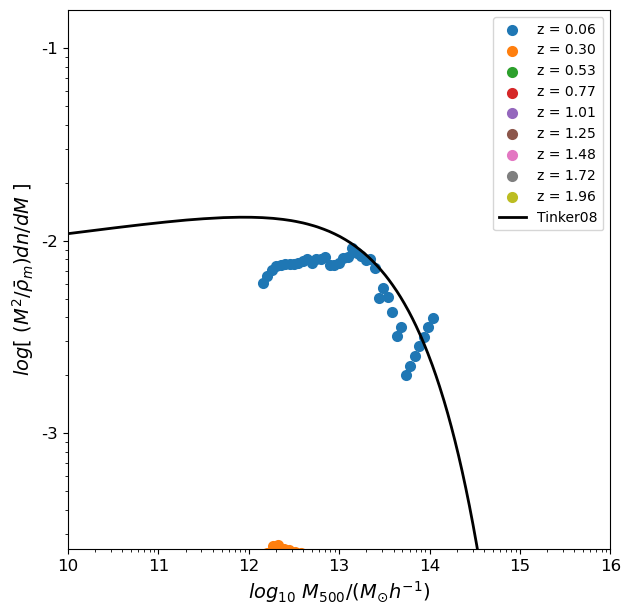

In [275]:
N_bins = 40 # bins for MASSES

x_final = []
y_final = []

#beans = np.logspace(11, 15, N_bins+1) 

plt.figure(figsize=(7,7))

for zz in z_binned[::3]:
    
    MASSES = dictionary[zz]
    
    beans = np.logspace(np.log10(min(MASSES)), np.log10(max(MASSES)), N_bins+1) 
    #beans = np.linspace(min(MASSES), max(MASSES), N_bins+1)
    dNdM, M_left = np.histogram(MASSES, bins=beans)
    
   # print(dNdM)
   # print(sum(dNdM))
    
    #percent = dNdM/sum(dNdM)
    
    #print(percent)

    #print(sum(dM))
    
    dM = np.diff(M_left)            # array of steps for MASSES, it is NOT the same for each bin
    M_binned = (M_left[:-1]+M_left[1:])/2     # array of centers of each bin
    
    dNdM_cumulative=np.zeros(N_bins)

    for i in range(0, N_bins):                 # cumulative, see above
        dNdM_cumulative[i] = np.sum(dNdM[i+1:])   # or just i

    dndM = dNdM_cumulative/phys_dcv_new(zz, dz, Omega_M, Omega_L) #Mpc^(-3)
    
    rho_mean = rho_crit(zz, Omega_M, Omega_L)/h**2  # h^2 Msun/kpc^3
    
    yyy = (M_binned**2/rho_mean)/1e9*dndM/dM/N_bins*1000 #*percent#(dM*sum(dNdM))*dNdM  # sure? dimension is h
    
    x_final.append(M_binned)
    y_final.append(yyy)
    
    plt.scatter(M_binned, yyy, linewidth=2, label='z = '+f'{zz:.2f}')

#plt.scatter(x_final, y_final)
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**10, 10**16)
plt.ylim(10**(-3.6), 10**(-0.8))
plt.xlabel("$log_{10} \ M_{500}/(M_{\odot} h^{-1})$", fontsize = 14)
plt.ylabel(r"$log[ \ (M^2/\bar{\rho}_{m}) dn/dM \ ]$", fontsize = 14)
plt.xticks([10**(10+g) for g in [0,1,2,3,4,5,6]], [10+g for g in [0,1,2,3,4,5,6]], fontsize = 12)
plt.yticks([10**(g) for g in [-3,-2,-1]], [-3,-2,-1], fontsize = 12)
plt.plot(x_fit, y_fit, color='black', label='Tinker08', linewidth=2)
#plt.grid()
plt.legend(fontsize = 10, loc=1)
plt.show()

### 4. Mass function from Tinker 2008 and `hmf`:

https://hmf.readthedocs.io/en/latest/_autosummary/hmf/MassFunction/hmf.mass_function.hmf.MassFunction.halo_overdensity_mean.html#hmf.mass_function.hmf.MassFunction.halo_overdensity_mean

In [123]:
from hmf import MassFunction

In [124]:
MassFunction.get_all_parameter_defaults(recursive=False)

{'cosmo_model': FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486),
 'cosmo_params': {},
 'n': 0.9667,
 'sigma_8': 0.8159,
 'growth_params': {},
 'lnk_min': -18.420680743952367,
 'lnk_max': 9.903487552536127,
 'dlnk': 0.05,
 'z': 0.0,
 'transfer_model': hmf.density_field.transfer_models.CAMB,
 'transfer_params': {},
 'takahashi': True,
 'growth_model': hmf.cosmology.growth_factor.GrowthFactor,
 'hmf_model': hmf.mass_function.fitting_functions.Tinker08,
 'Mmin': 10.0,
 'Mmax': 15.0,
 'dlog10m': 0.01,
 'mdef_model': None,
 'mdef_params': {},
 'delta_c': 1.686,
 'hmf_params': {},
 'filter_model': hmf.density_field.filters.TopHat,
 'filter_params': {},
 'disable_mass_conversion': True}

In [125]:
MassFunction.parameter_info(["cosmo_model","sigma_8"])

#The parameter names passed filter the output. 
#Call with no parameters to get info on all of them.

cosmo_model : instance of `astropy.cosmology.FLRW` subclass
    The basis for the cosmology -- see astropy documentation. Can be a custom
    subclass. Defaults to Planck15.

sigma_8 : float
    RMS linear density fluctuations in spheres of radius 8 Mpc/h



In [126]:
mf = MassFunction()

In [127]:
print(mf.quantities_available())

['ERROR_ON_BAD_MDEF', '_dlnsdlnm', '_growth_factor_fn', '_gtm', '_normalisation', '_power0', '_sigma_0', '_unn_sig8', '_unn_sigma0', '_unnormalised_lnT', '_unnormalised_power', 'cosmo', 'delta_k', 'dndlnm', 'dndlog10m', 'dndm', 'filter', 'fsigma', 'growth', 'growth_factor', 'halo_overdensity_crit', 'halo_overdensity_mean', 'hmf', 'how_big', 'k', 'lnsigma', 'm', 'mass_nonlinear', 'mdef', 'mean_density', 'mean_density0', 'n_eff', 'ngtm', 'nonlinear_delta_k', 'nonlinear_power', 'normalised_filter', 'nu', 'power', 'radii', 'rho_gtm', 'rho_ltm', 'sigma', 'transfer', 'transfer_function']


In [60]:
mf.halo_overdensity_mean

200.0

In [128]:
#mf.update(halo_overdensity_mean = 100)

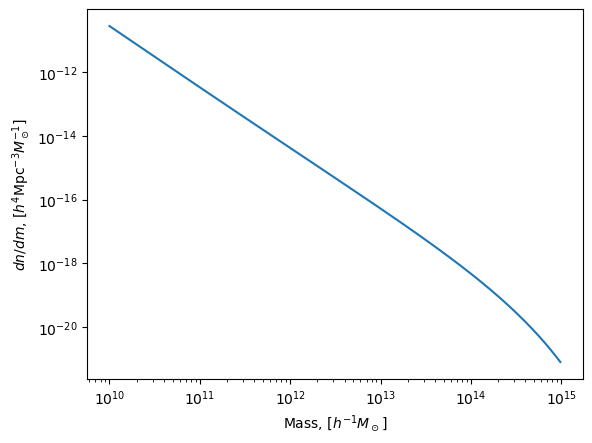

In [129]:
plt.plot(mf.m, mf.dndm)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$");

In [136]:
mf = MassFunction(z = 1.0,                  # Redshift of 1.0
                  cosmo_params={"Om0":0.3}, # Matter density of 0.3
                  hmf_model="Tinker08")           # Tinker fitting function

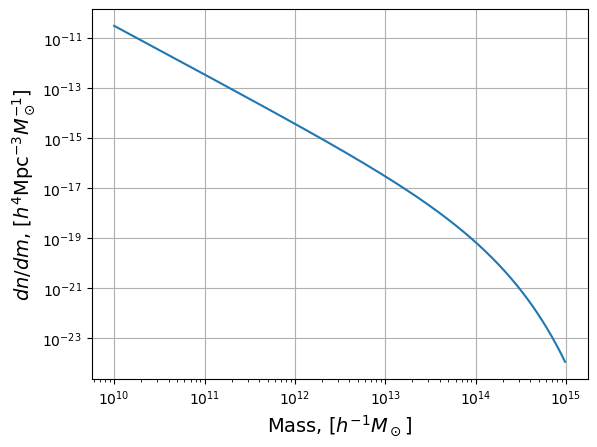

In [137]:
plt.plot(mf.m, mf.dndm)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$", fontsize=14)
plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$", fontsize=14)
plt.grid()

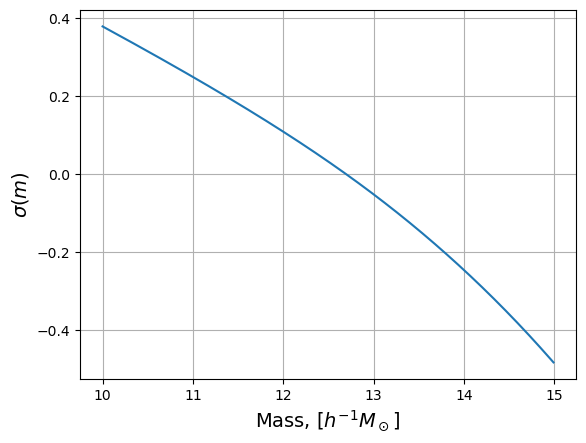

In [138]:
plt.plot(np.log10(mf.m), np.log10(mf.sigma))

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$", fontsize=14)
plt.ylabel(r"$\sigma(m)$", fontsize=14)
plt.grid()

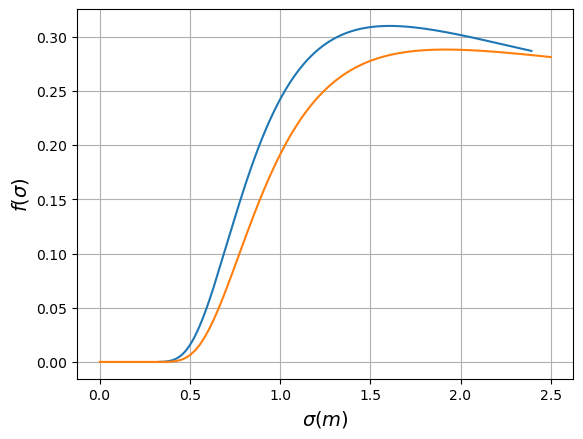

In [139]:
def func(sigma):
    A = 0.218
    a = 1.61
    b = 1.87
    c = 1.45
    return A*( (sigma/b)**(-a) + 1 )*np.exp(-c/sigma**2)

plt.plot(mf.sigma, mf.fsigma)

x = np.linspace(0.001,2.5,100)
plt.plot(x, func(x))

plt.xlabel(r"$\sigma(m)$", fontsize=14)
plt.ylabel(r"$f(\sigma)$", fontsize=14)
plt.grid()
plt.show()

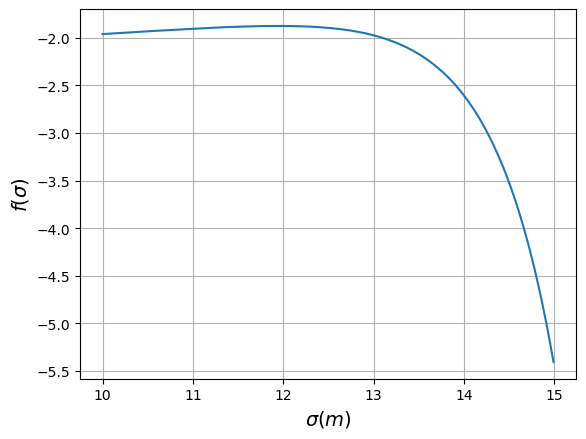

In [140]:
x_fit = mf.m
y_fit = mf.m**2*mf.dndm/2.77e11

plt.plot(np.log10(mf.m), np.log10(mf.m**2*mf.dndm/2.77e11))

plt.xlabel(r"$\sigma(m)$", fontsize=14)
plt.ylabel(r"$f(\sigma)$", fontsize=14)
plt.grid()
#plt.xscale('log')
#plt.yscale('log')
plt.show()